## **Notebook EC#12**
## Tune your scikit-learn model, here a Random Forest Classifier, using an evolutionary algorithm. Please, refer to [this content](https://towardsdatascience.com/tune-your-scikit-learn-model-using-evolutionary-algorithms-30538248ac16) for a better explanation of the code.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula <br>


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

In [2]:
print(X_train.shape)
print(X_test.shape)

(539, 64)
(1258, 64)


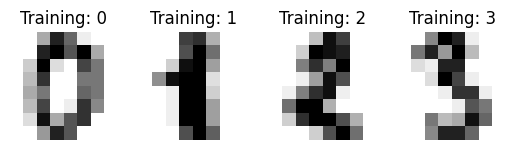

In [3]:
images_and_labels = list(zip(data.images, data.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [4]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 1000)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=15,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

2024-12-03 16:00:29.254782: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 16:00:29.359096: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 16:00:29.459166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 16:00:29.545628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 16:00:29.568786: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 16:00:29.723290: I tensorflow/core/platform/cpu_feature_gu

In [5]:
evolved_estimator.fit(X_train,y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.712395	0.130045   	0.903486   	0.482319   
1  	19    	0.831353	0.0617829  	0.903486   	0.705049   
2  	17    	0.851218	0.0453422  	0.909104   	0.786665   
3  	15    	0.879035	0.0362274  	0.909104   	0.786665   
4  	20    	0.886987	0.0205359  	0.90539    	0.842251   
5  	20    	0.901085	0.00906437 	0.909104   	0.875647   
6  	13    	0.906859	0.00248065 	0.909104   	0.903486   
7  	17    	0.908915	0.00056797 	0.909104   	0.907211   
8  	19    	0.909104	0          	0.909104   	0.909104   
9  	19    	0.909104	0          	0.909104   	0.909104   
10 	18    	0.909104	0          	0.909104   	0.909104   
11 	17    	0.909104	0          	0.909104   	0.909104   
12 	18    	0.909651	0.00164184 	0.914577   	0.909104   
13 	18    	0.910746	0.00250795 	0.914577   	0.909104   
14 	19    	0.91184 	0.0027364  	0.914577   	0.909104   
15 	17    	0.91403 	0.00164184 	0.914577   	0.909104   


GASearchCV(crossover_probability=0.8,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(max_depth=10, max_leaf_nodes=26,
                                            min_weight_fraction_leaf=0.012589382253687621,
                                            n_estimators=209),
           generations=15, keep_top_k=4, mutation_probability=0.1, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categor...
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x72ec498c0050>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x72ec483c18e0>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x72ec8e373b60>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x72ec49eee5d0>},
           population_size=10, return_train_score=True, scoring='accuracy',
           warm_start_configs=[])

In [6]:
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

0.9276629570747218

In [7]:
evolved_estimator.best_params_

{'min_weight_fraction_leaf': 0.012589382253687621,
 'bootstrap': True,
 'max_depth': 10,
 'max_leaf_nodes': 26,
 'n_estimators': 209}

In [8]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'min_weight_fraction_leaf': 0.012589382253687621,
  'bootstrap': True,
  'max_depth': 10,
  'max_leaf_nodes': 26,
  'n_estimators': 209},
 1: {'min_weight_fraction_leaf': 0.02931633892838753,
  'bootstrap': True,
  'max_depth': 12,
  'max_leaf_nodes': 26,
  'n_estimators': 828},
 2: {'min_weight_fraction_leaf': 0.02931633892838753,
  'bootstrap': True,
  'max_depth': 11,
  'max_leaf_nodes': 26,
  'n_estimators': 209},
 3: {'min_weight_fraction_leaf': 0.012589382253687621,
  'bootstrap': True,
  'max_depth': 12,
  'max_leaf_nodes': 26,
  'n_estimators': 209}}

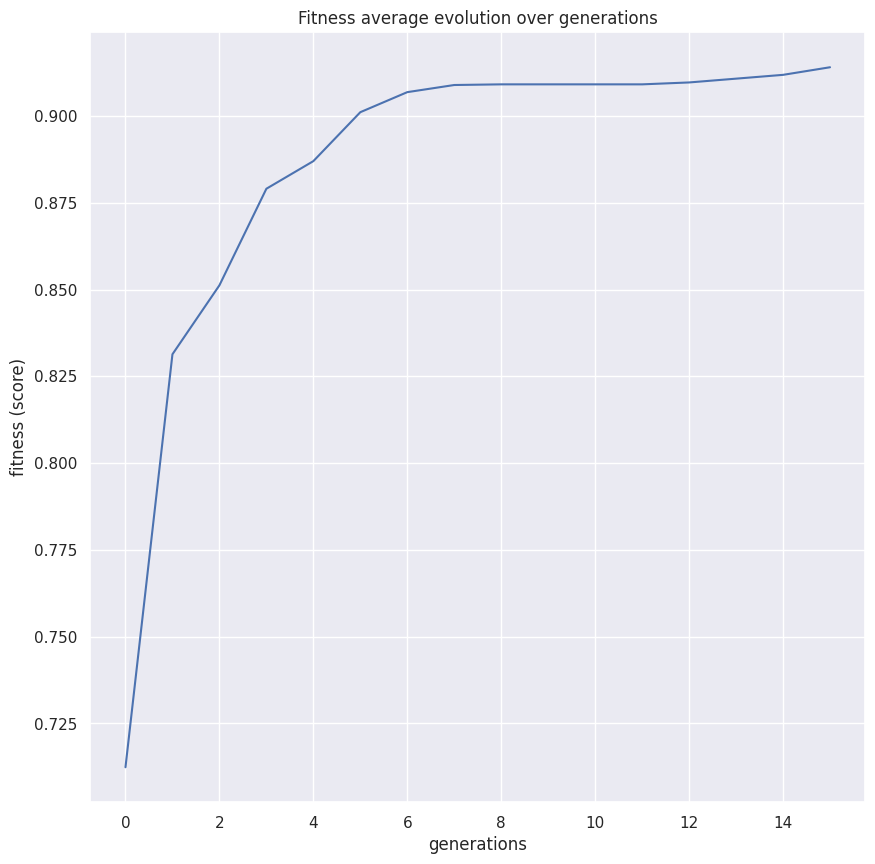

In [9]:
import warnings

# Set the warnings to be ignored
warnings.filterwarnings('ignore')

plot_fitness_evolution(evolved_estimator)
plt.show()

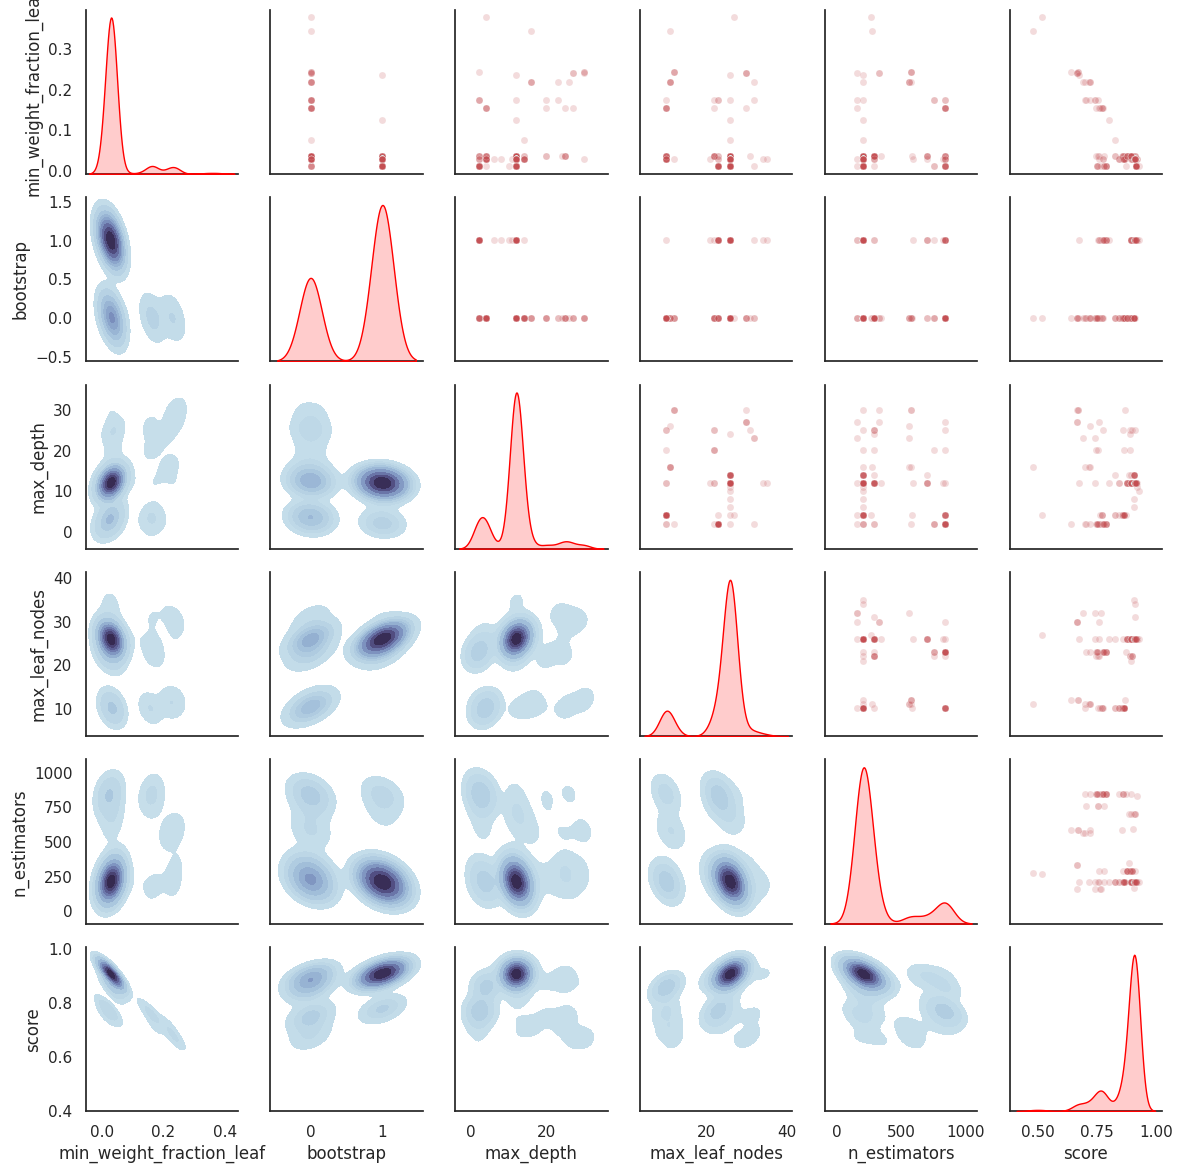

In [10]:
plot_search_space(evolved_estimator)
plt.show()

<font color="green">
Atividade (a) <br>
Na busca da melhor configuração de hiperparâmetros, foram considerados [min_weight_fraction_leaf], [bootstrap], [max_depth], [max_leaf_nodes]  e [n_estimators]. Consulte o conteúdo no link a seguir e descreva qual é o papel exercido por cada um desses hiperparâmetros em uma random forest.
</font>

Este é o [link](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html) a ser consultado como apoio à Atividade (a).

Resposta:<br><br>
**min_weight_fraction_leaf**<br>
O hiperparâmetro define a fração mínima do peso total dos dados que deve estar em um nó folha. Sua principal utilidade é controlar a complexidade do modelo - evitar overfitting - em problemas com desbalanceamento nas amostras. 

**bootstrap**<br>
Este hiperparâmetro indica se a técnica estatística bootstrap será usada ao construir as árvores da floresta. Quando True, cada árvore é construída com uma amostra aleatória com reposição dos dados de treinamento, o que aumenta a diversidade das árvores no conjunto. Esse procedimento é uma das razões pelas quais Random Forests são robustas e generalizam bem. Vale destacar a relevância desse procedimento ao observar que todas as melhores soluções candidatas fazem uso de boostrap sampling ("Best k solutions" todas True em bootstrap).

**max_depth**<br>
Controla a profundidade máxima das árvores. Um limite para a profundidade ajuda a evitar overfitting, cenários nos quais as árvores se tornam excessivamente complexas e capturam o ruído nos dados.

**max_leaf_nodes**<br>
Limita o número máximo de nós folha em cada árvore. Restringir o número de folhas pode simplificar o modelo e melhorar a generalização. Esse hiperparâmetro é útil para evitar que as árvores cresçam excessivamente e se tornem muito específicas.
Busca-se um ponto que equilibre performance e custo, de forma que adicionar mais árvores não melhora significativamente o desempenho.

<font color="green">
Atividade (b) <br>
Consultando o link a seguir, procure interpretar os resultados apresentados com a execução da última célula de código, logo acima.
</font>

Este é o [link](https://towardsdatascience.com/tune-your-scikit-learn-model-using-evolutionary-algorithms-30538248ac16) a ser consultado como apoio à Atividade (b).

Resposta:<br><br>
Os gráficos acima da diagonal principal são gráficos de dispersão entre dois hiperparâmetros ou um deles e o score. Certamente há alguns pontos mais intensos, entretanto, com exceção de boostrap que possui apenas valores 0 ou 1, diversas combinações de hiperparâmetros foram testadas pelo algorítmo. Os gráficos da diagonal representam uma distribuição dos valores testados de cada hiperparâmetro. Por fim, os gráficos sob a diagonal principal indicam a densidade de pontos testados. Nota-se que, considerando os eixos trocados, representam muito bem os gráficos de dispersão simétricos em relação a diagonal principal, confirmando que praticamente todo o espaço de busca foi utilizado - com exceção de bootstrap e min_weight_fraction_leaf que valores menores predominaram de fato.